In [ ]:
import pandas as pd
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.ensemble import IsolationForest
from sklearn.metrics import average_precision_score, precision_score, \
                        recall_score, precision_recall_curve, roc_curve, \
                        roc_auc_score
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
import random
from functools import partial

from os.path import isfile
from collections import Counter
!pip install category_encoders
import category_encoders as ce
from imblearn.over_sampling import SMOTE
# The following library is to plot the loss during training
# https://github.com/stared/livelossplot
! pip install livelossplot
from livelossplot import PlotLossesKerasTF

import pickle # to serialize/deserialize objects
from statistics import mean
import numpy as np
import math 
import matplotlib.pyplot as plt # For plots
import os # To import external python files
import sys# To import external python files


from pandas.plotting import scatter_matrix
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
import visualization
from visualization import plot_conf_mat, plot_feature_importances
from visualization import silhouette_diagram, plot_conf_mat, \
                      false_positive_rate, evaluate_anomaly_detector
## Download the code I prepared for you
!wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
!wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py

from andrea_models import AndreaLinearRegression


from google.colab import drive
drive.mount("/content/drive", force_remount=True)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.6 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 9.4 MB/s 
     |████████████████████████████████| 381 kB 29.9 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.


--2022-06-08 12:56:31--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13008 (13K) [text/plain]
Saving to: ‘visualization.py’

visualization.py    100%[===================>]  12.70K  --.-KB/s    in 0s      

2022-06-08 12:56:32 (75.2 MB/s) - ‘visualization.py’ saved [13008/13008]

--2022-06-08 12:56:32--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HT

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/P3 data/traininginputs.csv')
y = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/P3 data/trainingoutput.csv')
df['Binar OP130_Resultat_Global_v']=y['Binar OP130_Resultat_Global_v']


In [ ]:
#on importe les resultats dans le dataset
removed_columns = ["PROC_TRACEINFO"]
df = df.drop(columns=removed_columns)

#on divise le dataset

In [ ]:
mount_point = '/content/drive' # Always the same, don't change it
drive.mount(mount_point, force_remount=True)
drive_path = mount_point + '/My Drive/' # Always the same, don't change it

# Replace the following folder with some folder inside your google drive
my_path = drive_path + 'p3_data/'

Mounted at /content/drive


In [ ]:
df_train, df_test = train_test_split(df, test_size=0.25)
y_train=df_train["Binar OP130_Resultat_Global_v"]
X_train=df_train.drop(columns="Binar OP130_Resultat_Global_v")
y_test=df_test["Binar OP130_Resultat_Global_v"]
X_test=df_test.drop(columns="Binar OP130_Resultat_Global_v")

# binaire capuchon mesure

In [ ]:
df=df.fillna(0)

In [ ]:
for i in df['OP100_Capuchon_insertion_mesure']:
  if i!=0:
    i=1
  else:
    i=0

In [ ]:
df

,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value,Binar OP130_Resultat_Global_v
0,180.4,190.51,173.1,113.64,12.04,12.16,0.00,11.97,6.62,26.37,18.8,109.62,6.60,0
1,138.7,147.70,163.5,109.77,12.12,12.19,0.39,11.97,6.41,21.03,18.5,105.48,6.40,0
2,180.9,150.87,181.2,109.79,11.86,12.24,0.00,11.97,6.62,25.81,17.5,100.03,6.61,0
3,173.5,159.56,151.8,113.25,11.82,12.35,0.39,11.97,6.62,24.62,15.6,104.94,6.61,0
4,174.5,172.29,177.5,112.88,12.07,12.19,0.00,11.97,6.62,29.22,33.6,99.19,6.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34510,158.2,168.40,180.6,110.65,11.88,12.23,0.00,11.98,6.61,24.03,14.8,98.76,6.61,0
34511,139.4,146.24,154.5,108.14,12.04,12.27,0.41,11.97,6.41,21.52,15.5,98.37,6.40,0
34512,165.5,157.34,149.8,112.77,12.09,12.17,0.00,11.97,6.62,22.65,24.4,92.92,6.62,0
34513,152.4,165.07,140.0,111.19,12.06,12.34,0.00,11.97,6.60,20.77,13.6,101.21,6.60,0


# supprimer capuchon mesure


In [ ]:
removed_columns = ["OP100_Capuchon_insertion_mesure"]
df = df.drop(columns=removed_columns)

# Nans

In [ ]:
mean_v = df['OP100_Capuchon_insertion_mesure'].mean()

df_inputted = df.copy()
df_inputted['OP100_Capuchon_insertion_mesure'] = df_inputted['OP100_Capuchon_insertion_mesure'].fillna(mean_v)
df=df_inputted

In [ ]:
from matplotlib.pyplot import ylabel
df.columns[df.isnull().any()].tolist()

['OP100_Capuchon_insertion_mesure']

In [ ]:
print("NaN of OP070_V_1_angle_value = ", df['OP070_V_1_angle_value'].isna().sum() )
print("NaN of OP100_Capuchon_insertion_mesure = ", df['OP100_Capuchon_insertion_mesure'].isna().sum() )

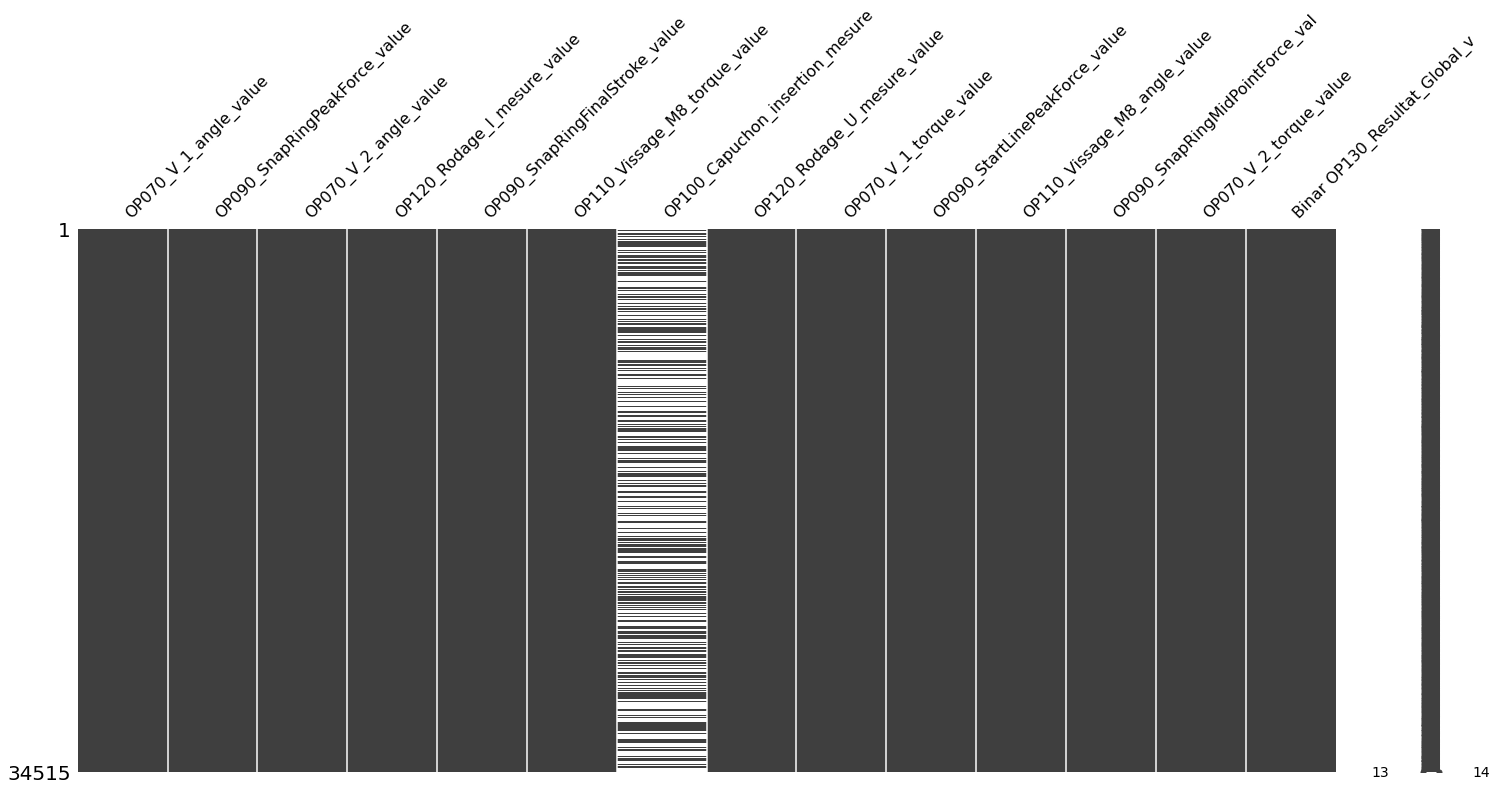

In [ ]:
msno.matrix(df)

In [ ]:
df["OP100_Capuchon_insertion_mesure"	].describe()

Remplissage par moyenne

In [ ]:
capu = df['OP100_Capuchon_insertion_mesure'].apply(lambda x: x is not None)
df['OP100_Capuchon_insertion_mesure'] = capu
removed_columns = ["OP110_Vissage_M8_torque_value","OP120_Rodage_U_mesure_value","OP070_V_1_torque_value","OP090_SnapRingFinalStroke_value","OP070_V_2_torque_value"]
df_cleaned = df.drop(columns=removed_columns)
df = df_cleaned


# voir quand ca vaut 1 et etudier les features

In [ ]:
df2=df_train[df_train['Binar OP130_Resultat_Global_v']==0 ]
df2.describe()

,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value,Binar OP130_Resultat_Global_v
count,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,11021.000000,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,23955.0
mean,159.960463,156.892584,159.625356,113.351079,11.970042,12.256910,0.388161,11.971033,6.548690,23.632390,17.867552,97.702536,6.550939,0.0
std,15.691737,11.264339,15.112644,3.551894,0.169329,0.065324,0.024171,0.003057,0.097574,2.531532,6.748903,6.827061,0.094654,0.0
min,101.800000,0.000000,82.000000,99.990000,0.000000,12.040000,0.240000,11.970000,5.670000,0.000000,6.300000,0.000000,5.850000,0.0
25%,148.600000,149.200000,149.500000,111.030000,11.850000,12.210000,0.380000,11.970000,6.410000,22.290000,13.500000,94.280000,6.420000,0.0
50%,158.000000,156.160000,158.700000,113.160000,12.040000,12.260000,0.390000,11.970000,6.610000,23.870000,16.400000,98.490000,6.610000,0.0
75%,169.600000,164.300000,168.900000,115.370000,12.080000,12.300000,0.410000,11.970000,6.620000,25.280000,20.100000,102.230000,6.610000,0.0
max,198.300000,196.920000,198.100000,177.950000,12.190000,12.500000,0.420000,11.990000,6.670000,43.080000,82.200000,127.300000,6.670000,0.0


In [ ]:
df3=df_train[df_train['Binar OP130_Resultat_Global_v']==1 ]
a=df3['Binar OP130_Resultat_Global_v'].count()
b=df2['Binar OP130_Resultat_Global_v'].count()
x=a/(b+a)
x

0.009714758164530797

# Vizualisation

In [ ]:
df_scaled.boxplot(column=[ 'OP070_V_2_angle_value'], by="Binar OP130_Resultat_Global_v", figsize=(10,5))

KeyError: ignored

In [ ]:
X_train

array([[0.86618257, 0.76635182, 0.70542636, ..., 0.11922504, 0.78263943,
        0.95698925],
       [0.83921162, 0.7754418 , 0.53316107, ..., 0.14157973, 0.60117832,
        0.75268817],
       [0.84024896, 0.78854357, 0.80275624, ..., 0.08494784, 0.76150825,
        0.95698925],
       ...,
       [0.74688797, 0.77396912, 0.85701981, ..., 0.21311475, 0.80526316,
        0.95698925],
       [0.5560166 , 0.85339224, 0.69767442, ..., 0.37704918, 0.76355067,
        0.93548387],
       [0.99688797, 0.78630916, 0.68217054, ..., 0.13561848, 0.65750196,
        0.7311828 ]])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d78d21b50>,
      dtype=object)

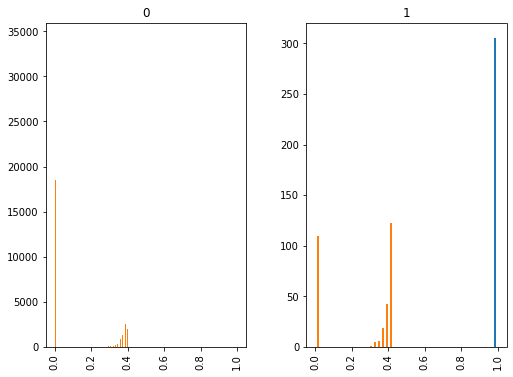

In [ ]:
collones =["Binar OP130_Resultat_Global_v","OP100_Capuchon_insertion_mesure"]
df[collones].hist(figsize=(8,6), by="Binar OP130_Resultat_Global_v",sharex=True,bins=45)

# Correlations

How do feature relate each other?

Use `scatter_matrix`. If the dataset is big, it would take too long. Let just selects few columns. For instance, the overall metrics (not the connection-wise metrics)

In [ ]:
# We first define a function to change the
# rotation of the text in the plot
   

# The following method takes too long
#     sm = scatter_matrix(df)


# Let us just consider some features
#on rajoute la colonne des résultats dans le dataframe pour avoir la corrélation
columns_to_plot = ['OP070_V_1_angle_value','OP090_SnapRingPeakForce_value','OP110_Vissage_M8_torque_value','Binar OP130_Resultat_Global_v']
sm = scatter_matrix(df[columns_to_plot],
                   figsize=(10,10))

plt.show()

comparer quand ca vaut 0 et 1 !!!

If we want to rotate labels, I prepared a function in the course library `visualization`

In [ ]:
sm = scatter_matrix(df[columns_to_plot],
                   figsize=(10,10))
visualization.rotate_labels(sm)
plt.show()

# Binary classification with Logistic Regression ( Moyen)


Logistic regression adds by default a regularization with weight `C`.
Let's try with no regularization first

In [ ]:
# We cannot directly write `C=0`, as the library wants `C`>0, so we just provide a very small `C`

columns = ['OP070_V_1_torque_value','OP070_V_2_torque_value','OP090_SnapRingPeakForce_value','OP070_V_1_angle_value','OP100_Capuchon_insertion_mesure']

X_train = df_train[columns]
X_test = df_test[columns]
y_train = df_train['Binar OP130_Resultat_Global_v']
y_test = df_test['Binar OP130_Resultat_Global_v']


In [ ]:
model = LogisticRegression(C=1e-9)
model.fit(X_train, y_train)

LogisticRegression(C=1e-09)

In [ ]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.99150118, 0.00849882],
       [0.99150139, 0.00849861],
       [0.99150118, 0.00849882],
       ...,
       [0.99150126, 0.00849874],
       [0.99150127, 0.00849873],
       [0.99150117, 0.00849883]])

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


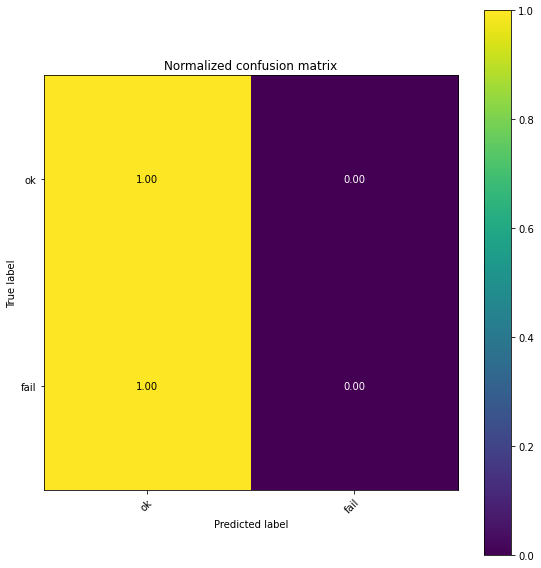

In [ ]:
class_names = np.array(['ok', 'fail'])
plot_conf_mat(y_test, y_pred, class_names)

In [ ]:
accuracy_score(y_test, y_pred)

0.6266079499362615

le résultat est trompeur car on prédis jamais les 1

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [ ]:
model = LogisticRegression(C=1)
model.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

Normalized confusion matrix
[[0.64208801 0.35791199]
 [0.49411765 0.50588235]]


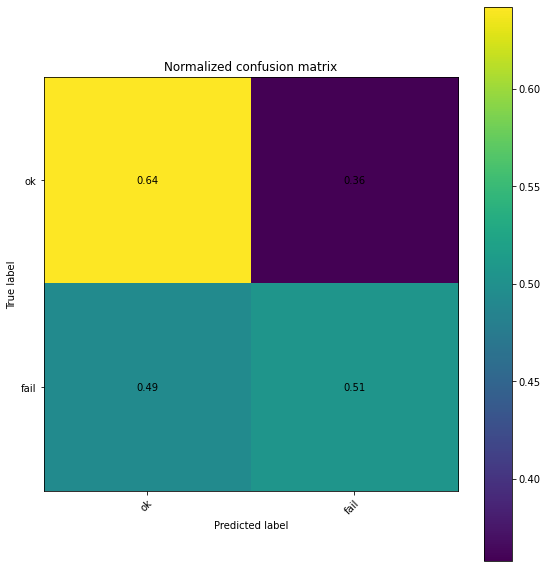

In [ ]:
class_names = np.array(['ok', 'fail'])
plot_conf_mat(y_test, y_pred, class_names)

In [ ]:
accuracy_score(y_test, y_pred)

0.6407463205469927

# Regression multinomiale

In [ ]:
def MyMultinomialRegression(C=1):
    return make_pipeline(
        StandardScaler(),
        LogisticRegression(multi_class="multinomial", solver="lbfgs", C=C)
    )

In [ ]:
MR = MyMultinomialRegression(C=1e-5)
MR.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1e-05, multi_class='multinomial'))])

In [ ]:
y_pred = MR.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 0])

Normalized confusion matrix
[[0.69510768 0.30489232]
 [0.52941176 0.47058824]]


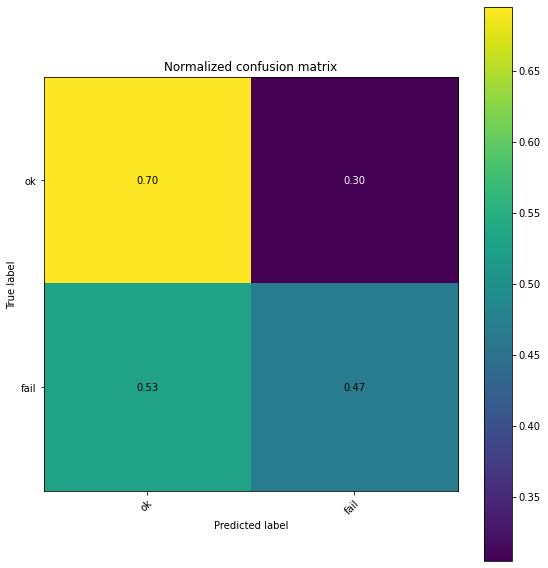

In [ ]:
class_names = np.array(['ok', 'fail'])
plot_conf_mat(y_test, y_pred, class_names)

In [ ]:
accuracy_score(y_test, y_pred)

0.692896048209526

# SMOTE


In [ ]:
print( "Samples per class before SMOTE: ", Counter(y_train) )

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

print( "Samples per class after SMOTE: ", Counter(y_train) )

Samples per class before SMOTE:  Counter({0: 25666, 1: 220})
Samples per class after SMOTE:  Counter({0: 25666, 1: 25666})


# Scaling


on scale en laissant en data frame 

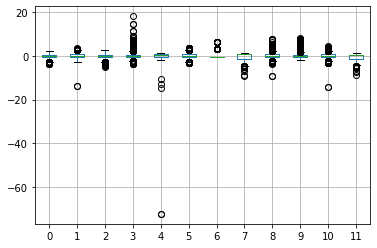

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
df_scaled = pd.DataFrame(X_train_scaled)
ax = df_scaled.boxplot()


With NN is important to **scale** the dataset

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

X_train

array([[0.65145228, 0.81911436, 0.52287582, ..., 0.1532567 , 0.76598586,
        0.95698925],
       [0.85062241, 0.71932765, 0.70774977, ..., 0.14176245, 0.76818539,
        0.72043011],
       [0.56120332, 0.74309364, 0.63865546, ..., 0.10472542, 0.73919874,
        0.74193548],
       ...,
       [0.69624874, 0.85667352, 0.6426146 , ..., 0.19490515, 0.7640537 ,
        0.94787047],
       [0.46699053, 0.80127292, 0.48425981, ..., 0.09111537, 0.77913843,
        0.72339904],
       [0.55264899, 0.85854446, 0.57639481, ..., 0.10025675, 0.80294132,
        0.95362764]])

# neural networks

In [ ]:
X_train.shape

(51324, 13)

In [ ]:
MLP = tf.keras.Sequential(
    [
        
        tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(64, activation="relu"),
     tf.keras.layers.Dense(32, activation="relu"),
     tf.keras.layers.Dense(2),
        tf.keras.layers.Softmax()
    ]
)
epochs=15
MLP.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history=MLP.fit(X_train, y_train,validation_split=0.2, epochs=epochs)

Epoch 1/15
1284/1284 [==============================] - 7s 5ms/step - loss: 0.6012 - accuracy: 0.6781 - val_loss: 0.8860 - val_accuracy: 0.2757
Epoch 2/15
1284/1284 [==============================] - 4s 3ms/step - loss: 0.5554 - accuracy: 0.7358 - val_loss: 0.5882 - val_accuracy: 0.7015
Epoch 3/15
1284/1284 [==============================] - 4s 3ms/step - loss: 0.5424 - accuracy: 0.7541 - val_loss: 0.6587 - val_accuracy: 0.6452
Epoch 4/15
1284/1284 [==============================] - 4s 3ms/step - loss: 0.5384 - accuracy: 0.7587 - val_loss: 0.6272 - val_accuracy: 0.6931
Epoch 5/15
1284/1284 [==============================] - 4s 3ms/step - loss: 0.5323 - accuracy: 0.7649 - val_loss: 0.7602 - val_accuracy: 0.5485
Epoch 6/15
1284/1284 [==============================] - 4s 3ms/step - loss: 0.5282 - accuracy: 0.7688 - val_loss: 0.6455 - val_accuracy: 0.6652
Epoch 7/15
1284/1284 [==============================] - 4s 3ms/step - loss: 0.5233 - accuracy: 0.7753 - val_loss: 0.6619 - val_accuracy:

In [ ]:
y_proba = MLP.predict(X_test)
y_pred=[]
for i in range(len(y_proba)):
  y_pred.append(np.argmax(y_proba[i]))

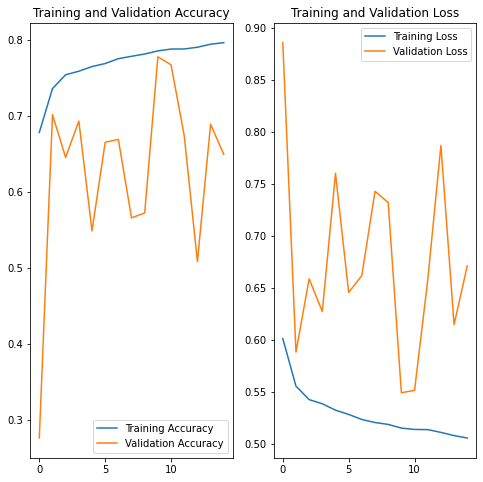

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Normalized confusion matrix
[[0.87962096 0.12037904]
 [0.75308642 0.24691358]]


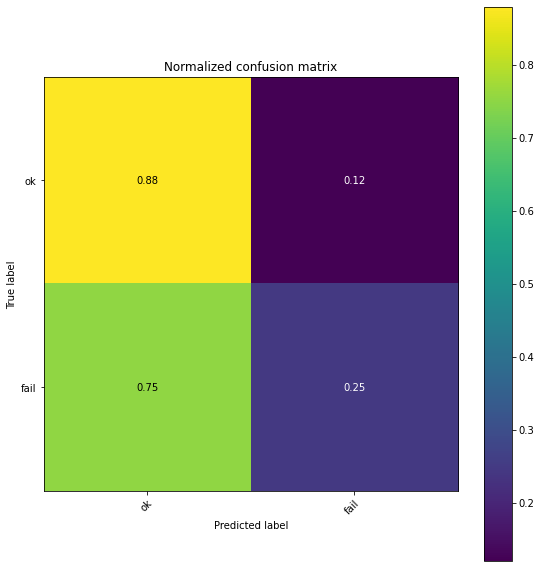

In [ ]:
class_names = np.array(['ok', 'fail'])
plot_conf_mat(y_test, y_pred, class_names)

In [ ]:
accuracy_score(y_test, y_pred)

0.87484065360992

# Training and testing a random forest

In [ ]:
X_train=X_train.drop(columns="OP110_Vissage_M8_angle_value")
X_test=X_test.drop(columns="OP110_Vissage_M8_angle_value")

rajoute ca en supprimant les features pas importantes

In [ ]:
model = RandomForestClassifier(n_estimators=100, 
                      criterion='gini', 
                      max_leaf_nodes=16, # Each tree cannot have more than that
                      random_state=5, # For reproducibility
                      n_jobs=-1, # Use all the CPUs
                      max_features = 'auto' # auto means=sqrt(n_features)
                      )

model.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_jobs=-1, random_state=5)

Normalized confusion matrix
[[0.89267322 0.10732678]
 [0.69411765 0.30588235]]


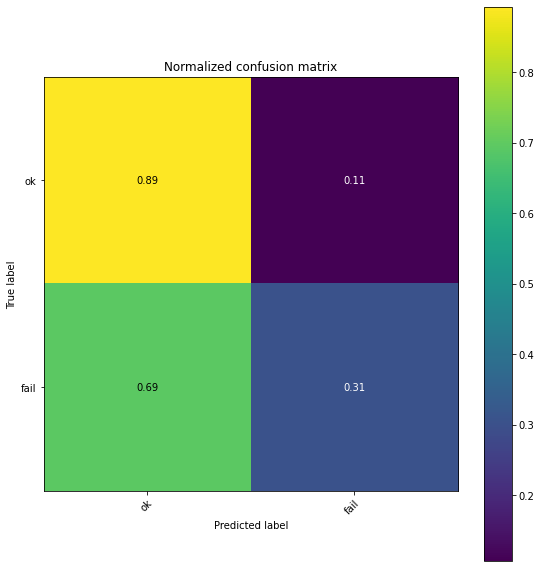

In [ ]:
y_pred = model.predict(X_test)

class_names = np.array(['ok', 'fail'])
plot_conf_mat(y_test, y_pred, class_names)

Let's check the feature importance

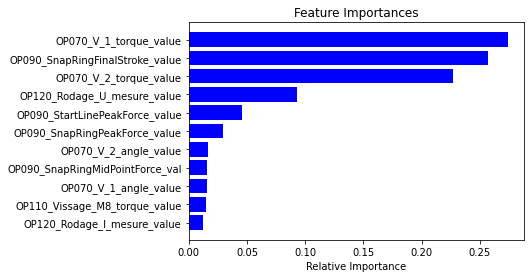

Index(['OP070_V_1_angle_value', 'OP090_SnapRingPeakForce_value',
       'OP070_V_2_angle_value', 'OP120_Rodage_I_mesure_value',
       'OP090_SnapRingFinalStroke_value', 'OP110_Vissage_M8_torque_value',
       'OP120_Rodage_U_mesure_value', 'OP070_V_1_torque_value',
       'OP090_StartLinePeakForce_value', 'OP090_SnapRingMidPointForce_val',
       'OP070_V_2_torque_value'],
      dtype='object')

In [ ]:
feature_names = X_test.columns
plot_feature_importances(model.feature_importances_, feature_names)
feature_names

# Hyperparameter tuning
You have three possibility:
* Manual tuning: 
  * Divide the training set in training subset and validation subset
  * Train different classifiers (with different hyperparameters) on the training subset
  * Check their performance, i.e., accuracy, on the validation subset
  * Choose the best
  * Test it on the test set
* `GridSearchCV` (as in `02.regression/b.polynomial-regression.ipynb`)
* `RandomizedSearchCV`

We use the latter now. See [Open Data Science post](https://medium.com/@ODSC/optimizing-hyperparameters-for-random-forest-algorithms-in-scikit-learn-d60b7aa07ead).

Let's first define the values of the parameters we want to explore

In [ ]:
 param_grid = {
    'criterion':['gini', 'entropy'],
    'max_features':[1,2,3,4,5],

    # Number of allowed leafs
    'max_leaf_nodes':[16, 32, 64, 128, 256, 512, 1024, 2048],

    # A node will be split if this split induces a decrease of the 
    # impurity greater than or equal to this value.
    'min_impurity_decrease' : [0, 0.001, 0.01, 0.1, 0.2],
            
    'max_depth':[1,10,100,1000,10000,100000],

    # A node can be a leaf only if it contains at least the following fraction
    # of samples
    'min_weight_fraction_leaf' : [0.1, 0.01, 0.001, 0]
    
}

We have a lot of possible configurations to check. We specify to just test 50
out of them.


In [ ]:
# Before we had used all the availble CPUs for training one random forest.
# Now, instead, we use one CPU per random forest (n_jobs=1). 
forest = RandomForestClassifier(n_estimators=100, random_state = 4, n_jobs=1,)


search = RandomizedSearchCV(
                            scoring = 'accuracy', # See other possible metrics in
                                                # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                            
                            estimator=forest, 
                            param_distributions=param_grid,
                            n_iter=50, # We just test 50 configurations
                            verbose=2,random_state=42, 
                            n_jobs=-1, # Triain forests in parallel using 
                                      # all CPUs
                            cv=5 # 5-fold validation                      
                          )
# Note that we are training different random forests in parallel (n_jobs=-1),
# each with a certain combination of hyper-parameters.

search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=1, random_state=4),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 10, 100, 1000, 10000,
                                                      100000],
                                        'max_features': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [16, 32, 64, 128, 256,
                                                           512, 1024, 2048],
                                        'min_impurity_decrease': [0, 0.001,
                                                                  0.01, 0.1,
                                                                  0.2],
                                        'min_weight_fraction_leaf': [0.1, 0.01,
                                                                     0.001,
                           

In [ ]:
print(search.best_params_)

model = search.best_estimator_
model= search

{'min_weight_fraction_leaf': 0, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 64, 'max_features': 3, 'max_depth': 100000, 'criterion': 'entropy'}


Now that we have the model with the best hyperparameters, we train it on the entire dataset

Normalized confusion matrix
[[0.93714888 0.06285112]
 [0.81176471 0.18823529]]


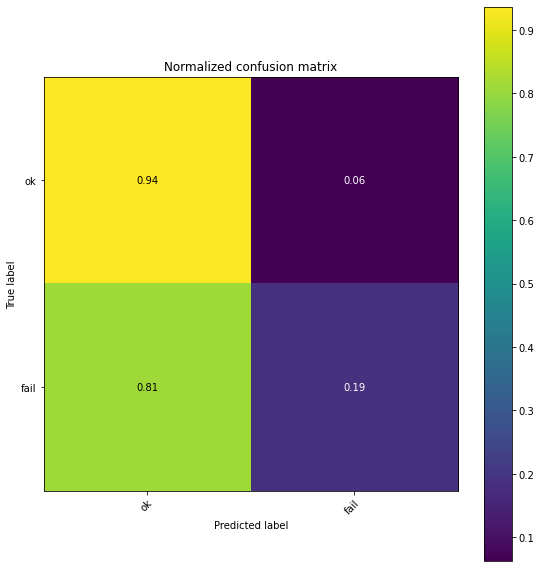

In [ ]:

y_pred = model.predict(X_test)

plot_conf_mat(y_test, y_pred, class_names)

Note that we get also get probabilities with RandomForests (fraction of trees that predicted `1`). And thus, we can compute cross-entropy

In [ ]:
proba = model.predict_proba(X_test)
print("Output probabilities are ",proba)


print("Cross entropy = ", log_loss(y_test, proba))

Output probabilities are  [[0.81709954 0.18290046]
 [0.73920749 0.26079251]
 [0.92763657 0.07236343]
 ...
 [0.93537775 0.06462225]
 [0.79938534 0.20061466]
 [0.88851729 0.11148271]]
Cross entropy =  0.2488448574614561


Don't confuse cross-entropy with entropy of a tree node!

Since it may take some time to perform randomized search, let's save the model (**serializing** the python object)

In [ ]:
filename = my_path+'forest-1.pkl'
pickle.dump(model, open(filename, 'wb'))

To later retrieve it:



In [ ]:
model = pickle.load(open(filename, 'rb'))

It is convenient to automate this process

In [ ]:
def search_or_load(model_filename, search, X_train, y_train):
  if(isfile(model_filename) ):
    print("Loading model")
    model = pickle.load(open(model_filename, 'rb'))

  else:
    print("Searching the best hyper_parameters")
    search.fit(X_train, y_train)
    print(search.best_params_)
    model = search.best_estimator_
    print("Training model")
    model.fit(X_train,y_train)
    pickle.dump(model, open(model_filename, 'wb'))
    print("Model saved in in file ", model_filename)
  return model


If we call this function, it will not redo the search, as the model has already been saved

In [ ]:
model = search_or_load(filename, search, X_train, y_train)

Loading model


### More iterations


Let's try to increase the number of tested configurations


In [ ]:
search = RandomizedSearchCV(
                            scoring = 'accuracy', # See other possible metrics in
                                                # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                            
                            estimator=forest, 
                            param_distributions=param_grid,
                            n_iter=200,
                            verbose=2,random_state=42, 
                            n_jobs=-1, # Triain forests in parallel using 
                                      # all CPUs
                            cv=5 # 5-fold validation                      
                          )



In [ ]:
filename = my_path + 'forest-2.pkl'
model = search_or_load(filename, search, X_train, y_train)

Searching the best hyper_parameters
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
{'min_weight_fraction_leaf': 0, 'min_impurity_decrease': 0, 'max_leaf_nodes': 2048, 'max_features': 3, 'max_depth': 100000, 'criterion': 'entropy'}
Training model
Model saved in in file  /content/drive/My Drive/p3_data/forest-2.pkl


Normalized confusion matrix
[[9.99531835e-01 4.68164794e-04]
 [1.00000000e+00 0.00000000e+00]]


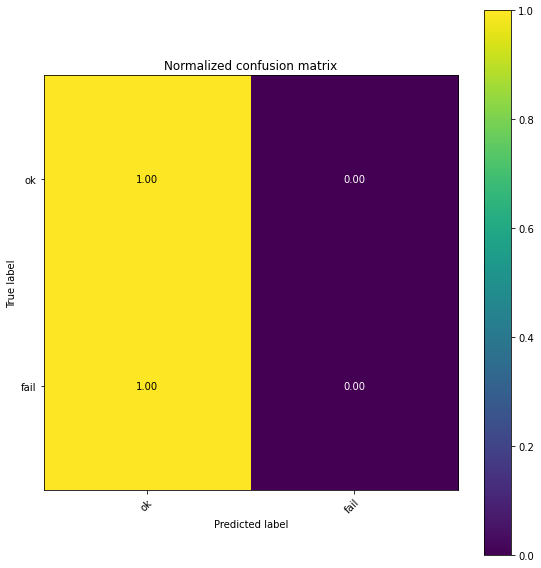

In [ ]:

y_pred = model.predict(X_test)

plot_conf_mat(y_test, y_pred, class_names)

It's better

Ways to improve eve further:
* Increase the number of trees
* Increase the number of configurations to try out

# Isolation forest

We will apply isolation forests on the credit card fraud dataset, already used in the [previous notebook](https://github.com/andreaaraldo/machine-learning-for-networks/blob/master/06.clustering-and-anomaly/06.a.kmeans-anomaly.ipynb). A similar notebook can be found in [Kaggle](https://www.kaggle.com/amarnayak/testing-isolation-forest-for-fraud-detection). 

 As in the [previous notebook](https://github.com/andreaaraldo/machine-learning-for-networks/blob/master/06.clustering-and-anomaly/06.a.kmeans-anomaly.ipynb), we separate training and test set.

In [ ]:
IF = IsolationForest()

Our approach is unsupervised, so we **don't use y into fit(..)**

In [ ]:
IF.fit(X_train)
anomaly_scores = 0.5 - IF.decision_function(X_train)

In the previous code, we shift by 0.5 and we invert the sign to obtain the anomaly score described in the original paper of Isolation Forests, which also corresponds to what I wrote in my slides. These shift and sign inversion is done to correct scikit learn internal computation (see [this post](https://stats.stackexchange.com/a/350893/161064)).

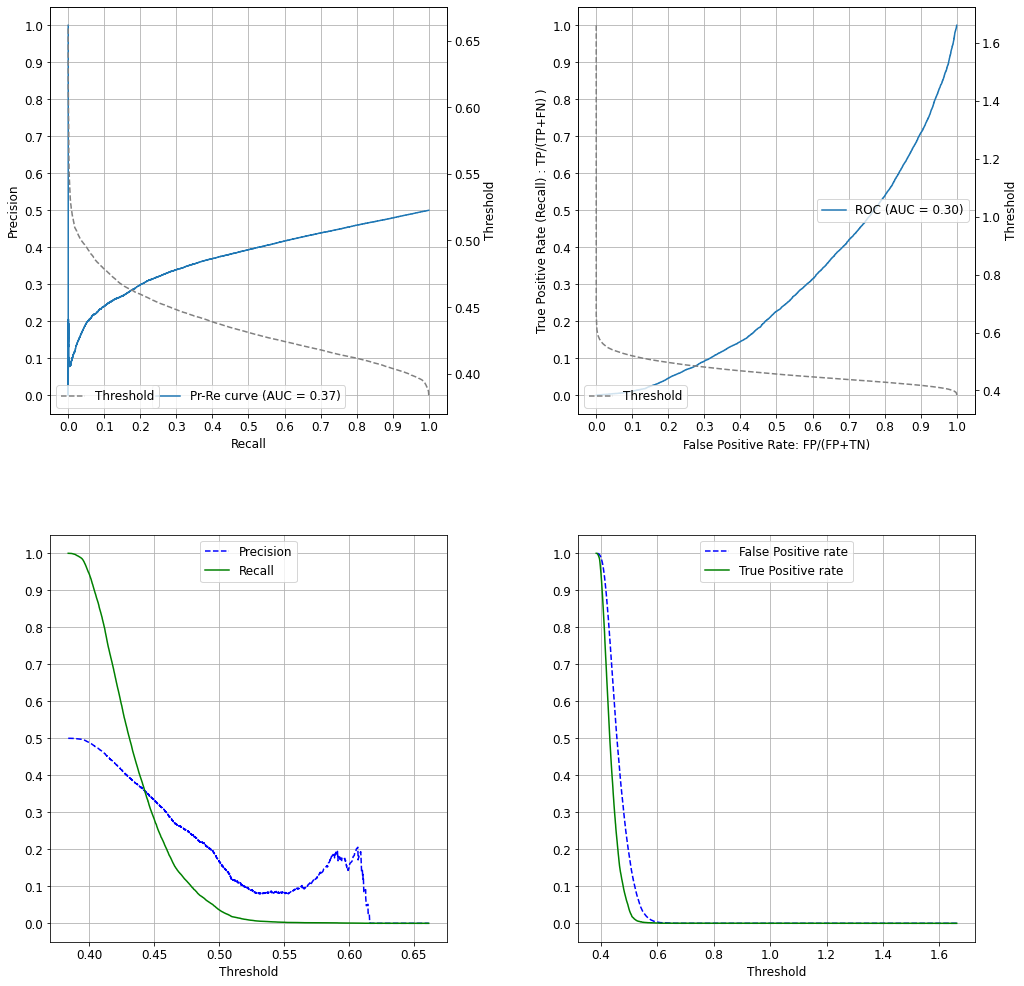

In [ ]:
evaluate_anomaly_detector(y_train, anomaly_scores)

Our isolation tree is still bad. The AUC of the precision-recall and ROC curves can be improved

### Number of trees

Increasing the number of trees always improves performance

In [ ]:
model = IsolationForest(n_estimators=500)
model.fit(X_train)


IsolationForest(n_estimators=500)

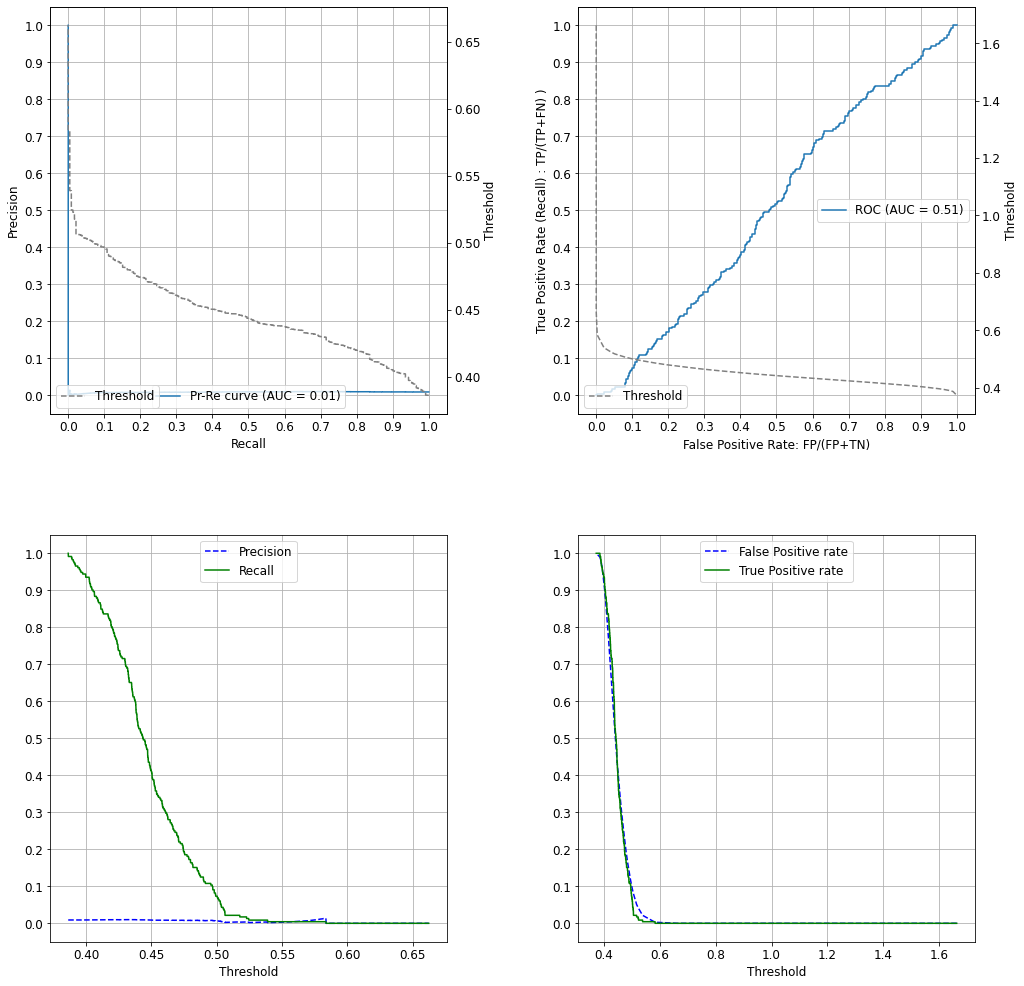

In [ ]:
anomaly_scores = 0.5 - model.decision_function(X_train)
evaluate_anomaly_detector(y_train, anomaly_scores)

### Others

GridSearch from `sklearn` is not simple (however not impossible) to apply. It is more simple to make a grid search manually

In [ ]:
iforest = IsolationForest(n_estimators=500)

for max_features in [1, 10]:
  for max_samples in range(256, X_train.shape[0], int(X_train.shape[0] / 3) ):
    model = IsolationForest(n_estimators=500, max_features=max_features,
                            max_samples = max_samples)
    model.fit(X_train)
    anomaly_scores = 0.5 - model.decision_function(X_train)
    auc_score = average_precision_score(y_train, anomaly_scores)
    print("max_fetaures:", max_features, "; max_samples:", max_samples, 
          "auc_score:", auc_score)

max_fetaures: 1 ; max_samples: 256 auc_score: 0.008670326258691251
max_fetaures: 1 ; max_samples: 8884 auc_score: 0.008041457382484879
max_fetaures: 1 ; max_samples: 17512 auc_score: 0.00811989875316311
max_fetaures: 10 ; max_samples: 256 auc_score: 0.008690983486432756
max_fetaures: 10 ; max_samples: 8884 auc_score: 0.008514622045219957
max_fetaures: 10 ; max_samples: 17512 auc_score: 0.008565620219098768


Let's evaluate the best configuration we found

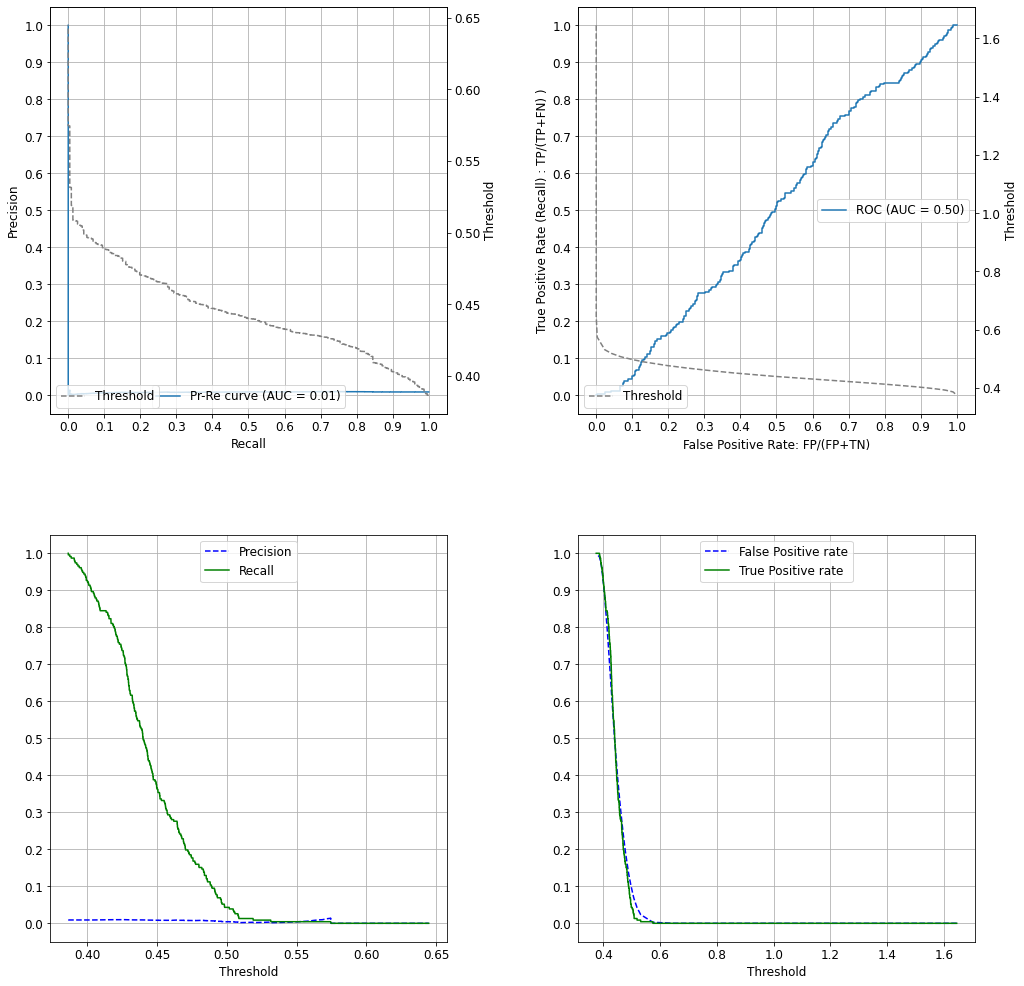

In [ ]:
n_estimators=500
max_features = 10
max_samples = 256

model = IsolationForest(n_estimators=n_estimators, max_features=max_features,
                        max_samples=max_samples)

model.fit(X_train)
anomaly_scores = 0.5 - model.decision_function(X_train)
evaluate_anomaly_detector(y_train, anomaly_scores)

Note that `auc_score` is different, since isolation forests have a lot of randomness.

No real improvement. Increase further the number of trees.

In [ ]:
n_estimators = 1500

model = IsolationForest(n_estimators=n_estimators, max_features=max_features,
                        max_samples=max_samples)

model.fit(X_train)

IsolationForest(max_features=10, max_samples=256, n_estimators=1500)

In [ ]:

anomaly_scores = 0.5 - model.decision_function(X_train)

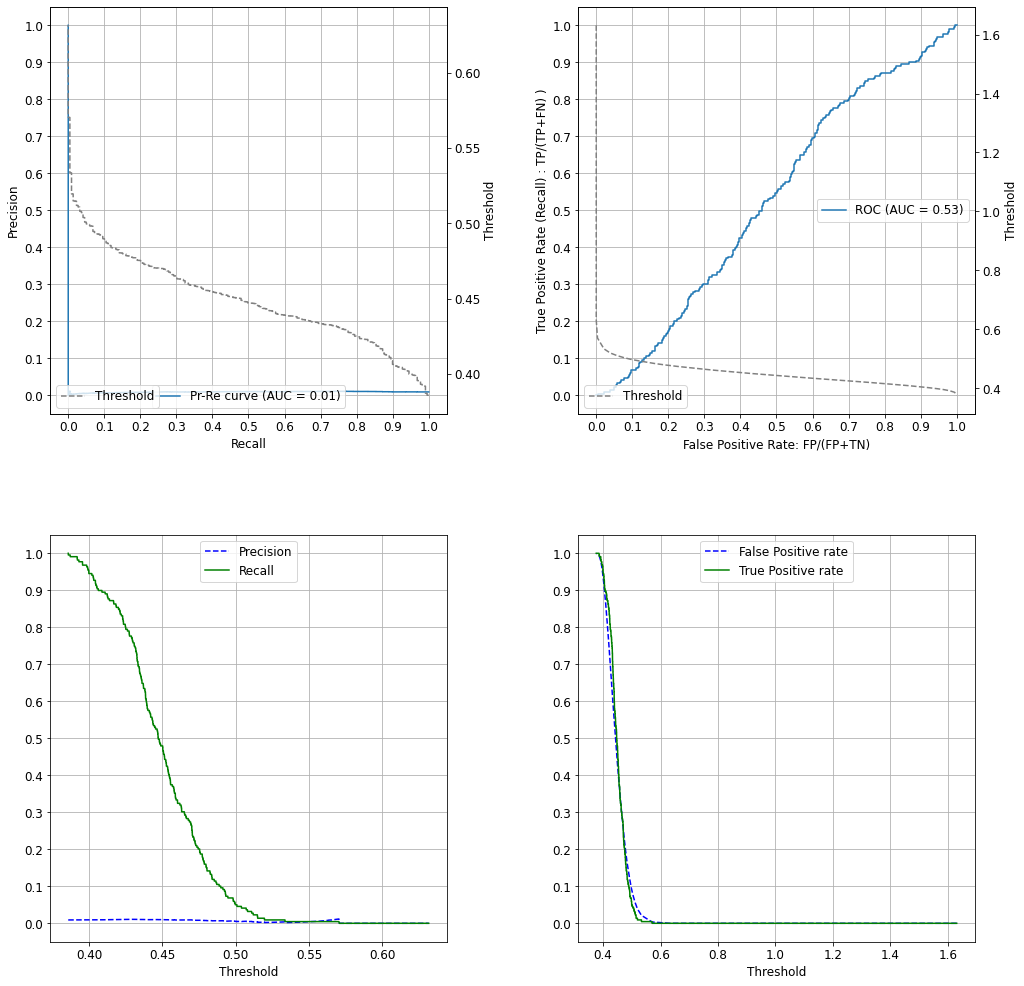

In [ ]:
evaluate_anomaly_detector(y_train, anomaly_scores)

# Fix the threshold

A good threshold could be:

Precision= 0.008962373483736383
Recall= 1.0
False Positive Rate =  1.0
True Positive Rate =  1.0


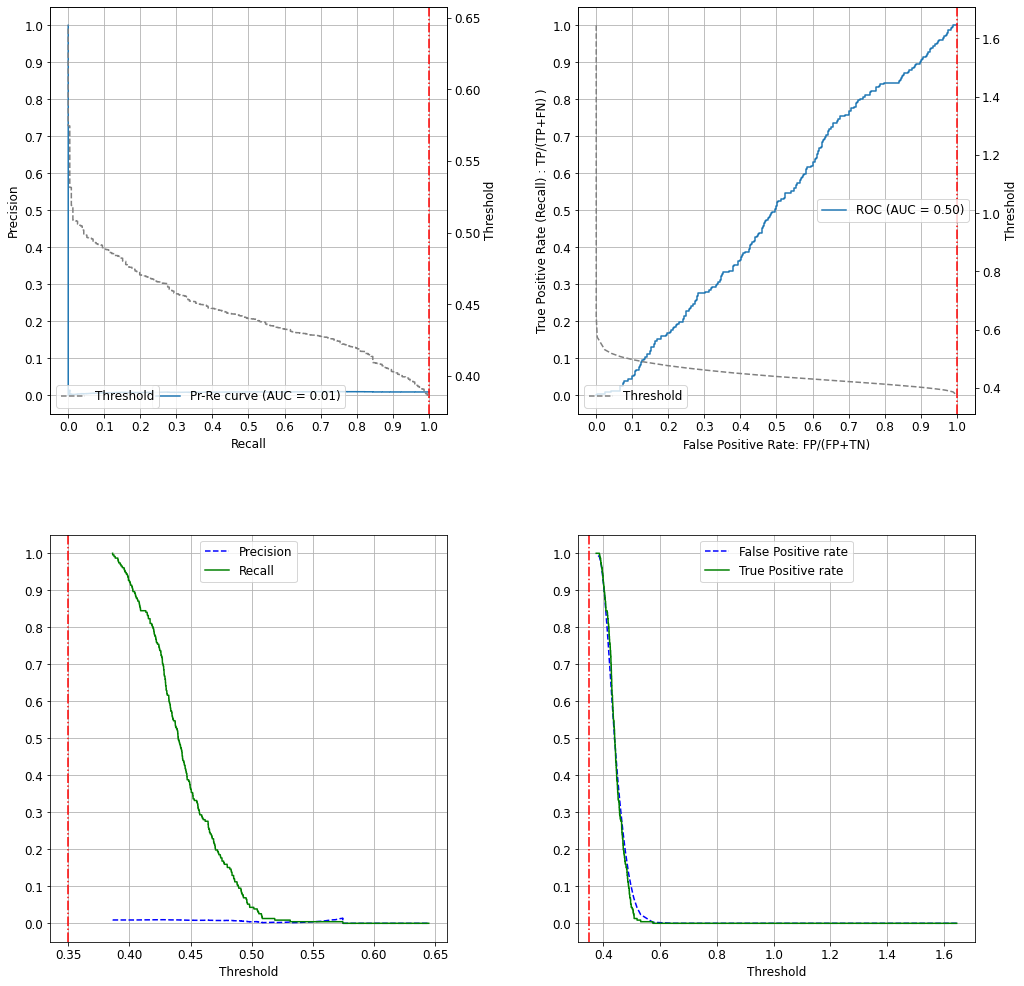

In [ ]:
threshold_selected = 0.35

evaluate_anomaly_detector(y_train, anomaly_scores, 
                          threshold_selected=threshold_selected)

But the false positive rate is too high. We need to renounce to some recall

Precision= 0.4673282402667297
Recall= 0.7432567849686847
False Positive Rate =  0.8471816283924843
True Positive Rate =  0.7432567849686847


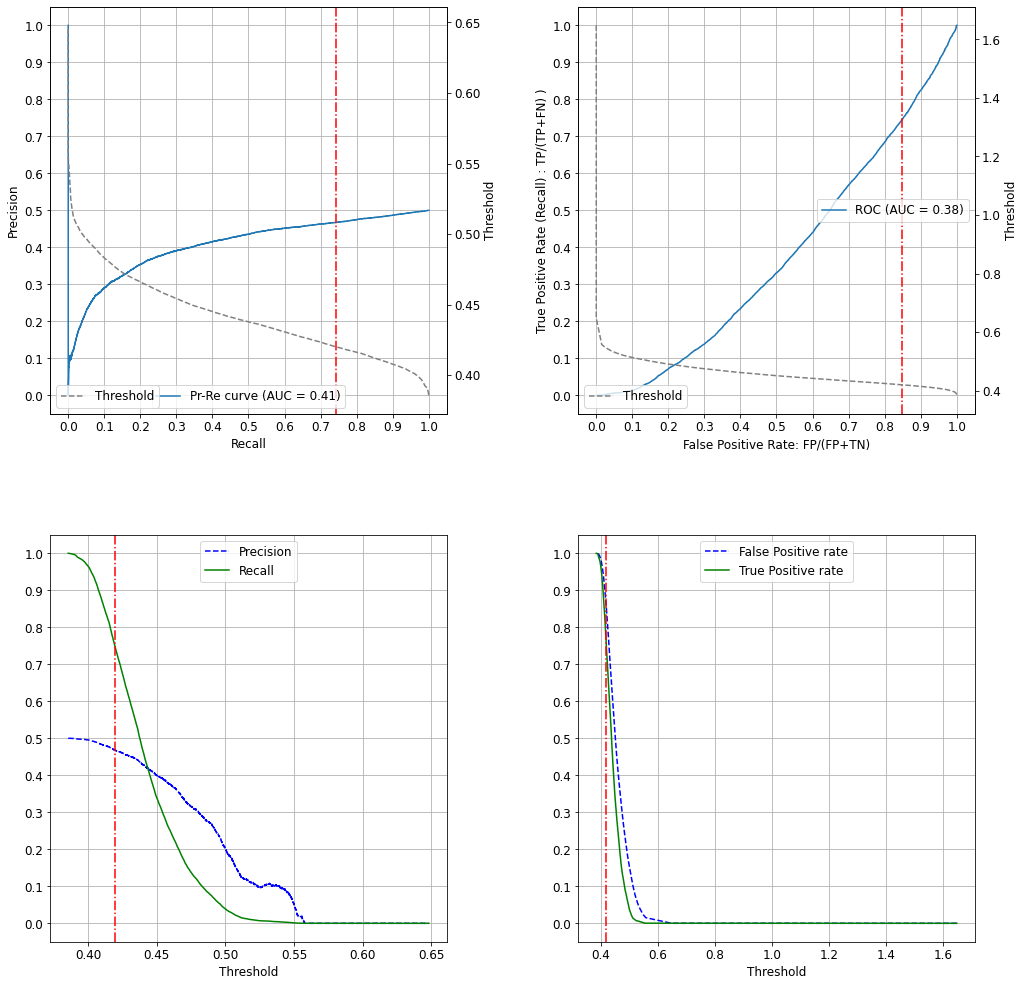

In [ ]:
threshold_selected = 0.42

evaluate_anomaly_detector(y_train, anomaly_scores, threshold_selected)

With this choice
* We find 84% of frauds
* We raise false alarms for 2% of normal activities

# Test


In [ ]:
model.fit(X_test)
an_scores = 0.4 - model.decision_function(X_test)

In [ ]:
y_pred = (an_scores >= threshold_selected)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
fpr = false_positive_rate(y_test, y_pred)

print("precision=", precision)
print('recall=', recall)
print('false positive rate=', fpr)


precision= 0.010549093859886394
recall= 0.5342465753424658
false positive rate= 0.427536231884058


Normalized confusion matrix
[[0.57246377 0.42753623]
 [0.46575342 0.53424658]]


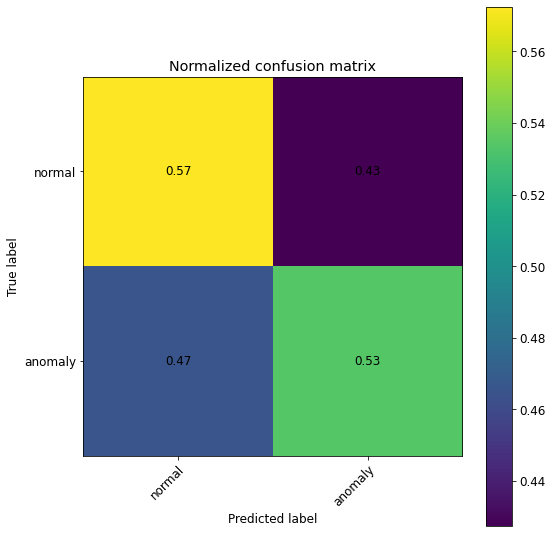

In [ ]:
class_names= np.array( ['normal', 'anomaly'] )
plot_conf_mat(y_test, y_pred, class_names)

# sauvegarde réseaux

permet sauvegarder

In [ ]:

with open(my_path+"rf.pkl", "wb") as dump_file:
  pickle.dump(model, dump_file)

permet d'utiliser le réseaux de neurones dans drive

In [ ]:
with open(my_path+"logistic-reg.pkl", "rb") as dump_file:
  model = pickle.load(dump_file)

besoin de definir pred

In [ ]:
def predict_fun(sample):
  y_pred = model.predict(sample)
  return y_pred

# xgboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold

In [ ]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [ ]:
xg_reg = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.4, learning_rate = 0.1,
                max_depth = 4, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

Normalized confusion matrix
[[0.90020466 0.09979534]
 [0.73404255 0.26595745]]


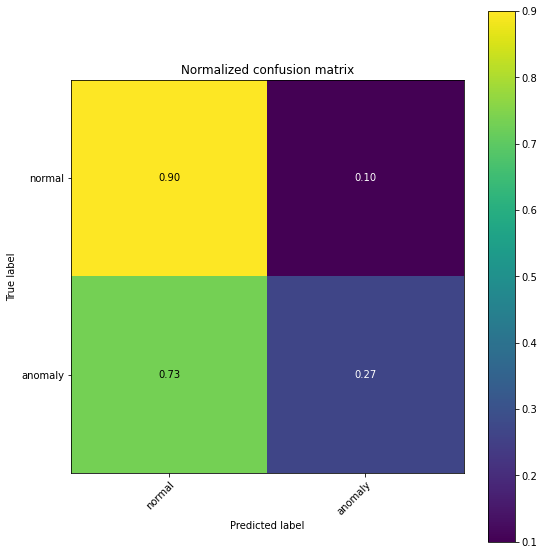

In [ ]:
class_names= np.array( ['normal', 'anomaly'] )
plot_conf_mat(y_test, preds, class_names)

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
folds = 3
param_comb = 5

In [ ]:
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

In [ ]:
random_search = GridSearchCV(xgb,param_grid=params, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3 )

In [ ]:
random_search.fit(X_train, y_train)

TypeError: ignored

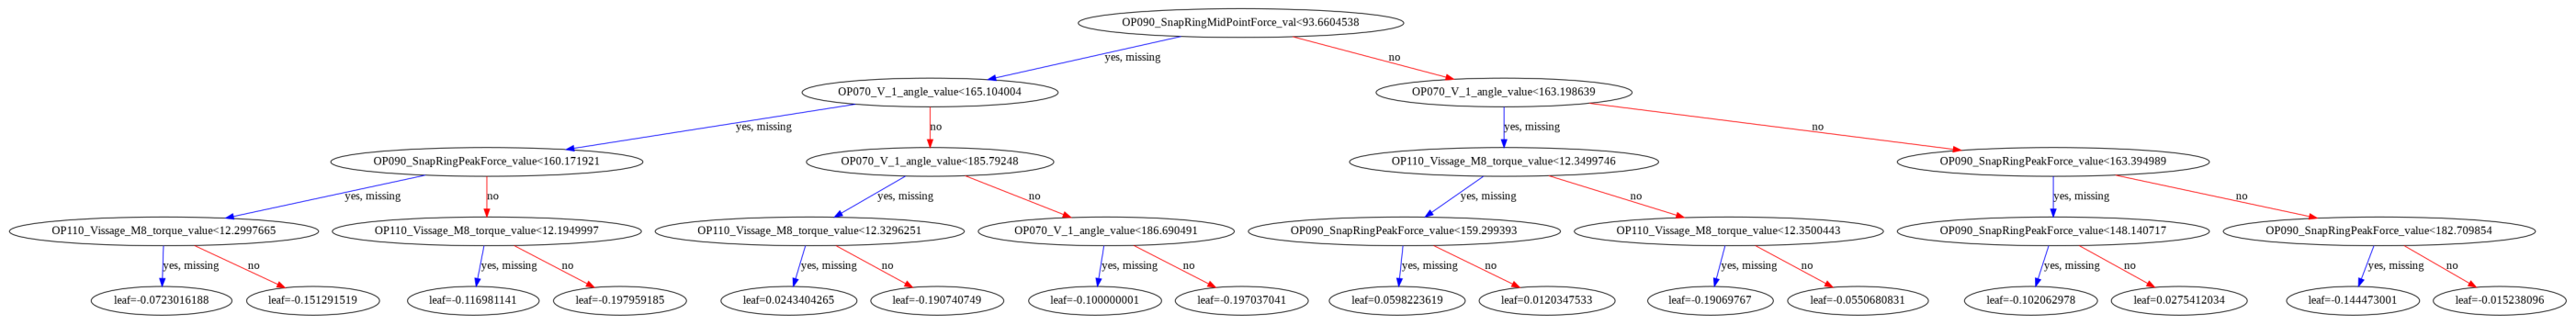

In [ ]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

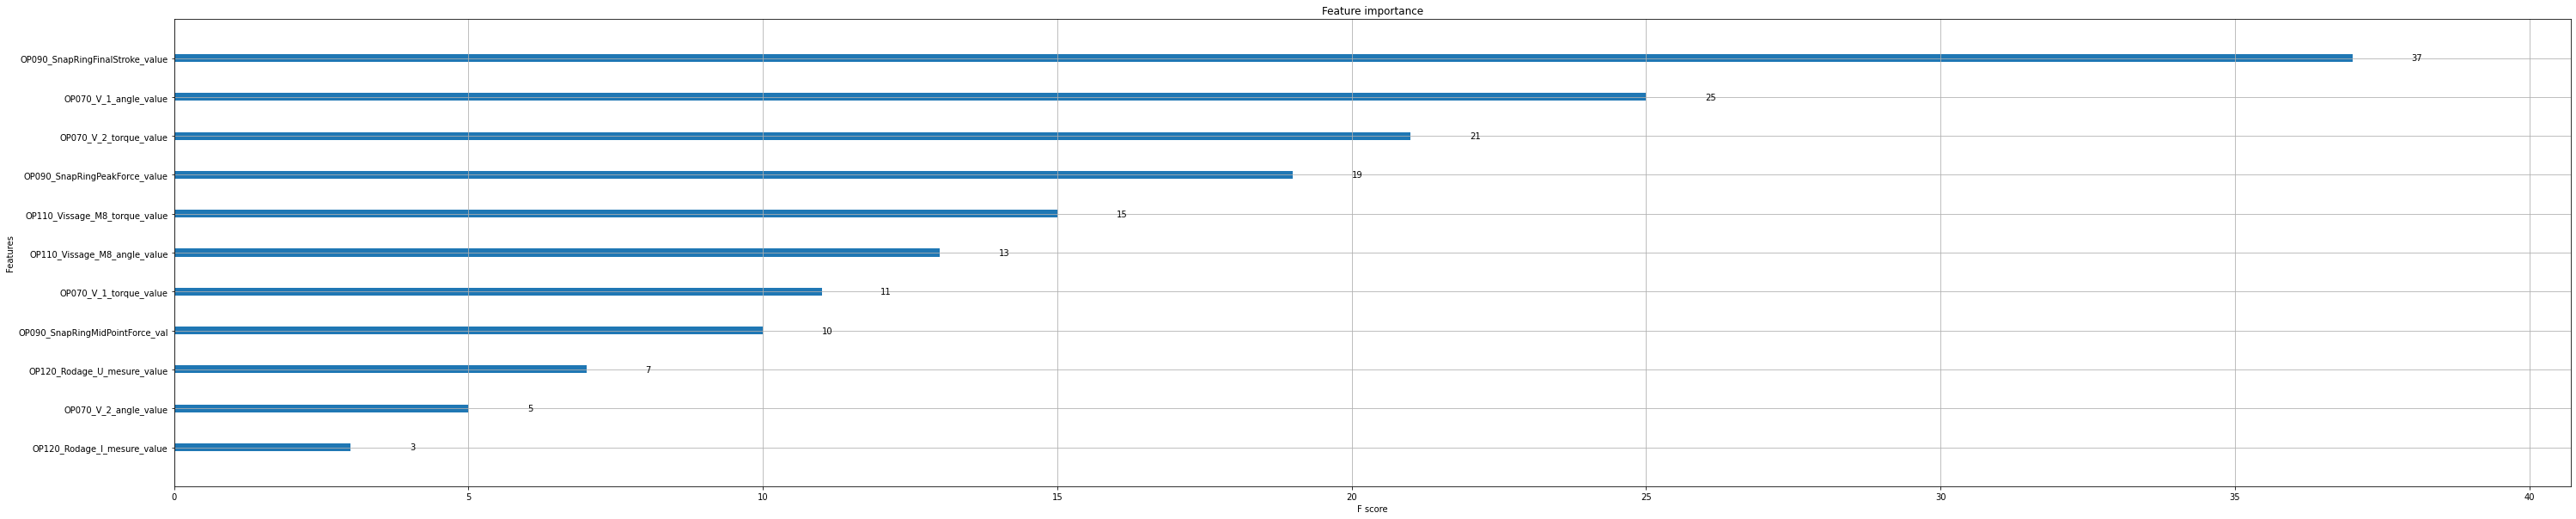

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

# Functions to build and train a neural net

Let's write the functions to build and train the model, similar to what we did in our [Neural Network's notebook](https://github.com/andreaaraldo/machine-learning-for-networks/tree/master/04.neural_networks).

In [ ]:
def make_sequential_model(sample_size, layer_sizes, 
                          hidden_activation_function="relu", 
                          out_activation_function="softmax",
                          loss_fun="categorical_crossentropy",
                          learning_rate=0.01,
                          regularization_coeff=0,
                          metrics=['accuracy']):
  """
  Makes a sequential model.
  Parameters
  -------------------------
  sample_size: integer
    The number of features of the samples

  layer_sizes: list
    List of the size of the neural network layers. For instance, if
    layer_sizes = [8, 6, 4], the 1st layer will have 5 neurons, the 2nd 6 etc.
    Attention: the size of the last layer (the output layer) is not arbitrary.
    In case of monodimensional regression, it must be 1.
    When using categorical_crossentropy, it must be the same as the number of 
    categories.
    When using binary_crossentropy, it must be 1.

  inner_activation_function: string
    Activation function used in all layers, except the last one.
    Ex: "relu"

  out_activation_function: string
    Activation function of the last layer.
    Ex. "softmax"

  loss_fun: string
    The loss function we want to minimize. Ex. categorical_crossentropy

  learning_rate: float
    Ex. 0.01

  regularization_coeff: float
    Coefficient of ridge regression
    Ex. 0.01

  metrics: list of strings
    The metrics we want to show during training. Ex. ['accuracy']
  """

  model = Sequential()


  # In the next code we will use `partial`, which is a function of the ptyhon
  # library functools, which allows to define a class, identical to another
  # class but with some different default values.
  # In our case we define MyDenseLayer equal to the standard keras class
  # `Dense`, which implements a simple neural network layer, specifying 
  # two default values: one for the activation function, and another for the
  # regularization

  if (regularization_coeff==0):
    # No regularization
    MyDenseLayer = partial(Dense, activation=hidden_activation_function)
  else:
    MyDenseLayer = partial(Dense, activation=hidden_activation_function,
                         kernel_regularizer=keras.regularizers.l2(regularization_coeff))

  # Add the input layer
  model.add( MyDenseLayer(layer_sizes[0], 
                  input_dim = sample_size) )
  
  # Add hidden layers
  for i in range(1,len(layer_sizes)-1 ): # We iterate from the 2nd element to the penultimate
    model.add( MyDenseLayer(layer_sizes[i]) )
    
  # Add output layer
  model.add( Dense(layer_sizes[-1],
                  activation = out_activation_function) )
  

  model.compile(loss=loss_fun, 
              optimizer=keras.optimizers.Adam(lr=learning_rate) ,
              metrics=metrics)
  
  return model

In [ ]:
def enforce_reproducibility(seed):
  tf.keras.backend.clear_session()

  # To know more: 
  #       https://machinelearningmastery.com/reproducible-results-neural-networks-keras/
  random.seed(seed)
  np.random.seed(random.randint(0,300000))
  tf.random.set_seed(random.randint(0,300000))

In [ ]:
def train_model(model, nn_file, X_tr, y_tr, seed, max_epochs=1000, 
                overwrite=True, validation_split=0.2, patience=10):
  """
  model: neural network model
            It must be a compiled neural network, e.g., a model issued by the
            function make_sequential_model(..) defined before

  nn_file:  string (name of a file)
            This file will be used to store the weights of the trained neural
            network. Such weights are automatically stored during training 
            (thanks to the ModelCheckpoint callback (see the implementation 
            code)), so that even if the code fails in the middle of training,
            you can resume training without starting from scratch.
            If the file already exists, before starting training, the weights
            in such a file will be loaded, so that we do not start training from
            scratch, but we start already from (hopefully) good weigths.
  
  overwrite: boolean
            If true, the model will be built and trained from scratch, 
            indipendent of whether nn_file exists or not.

  seed: integer

  X_tr: matrix
            Feature matrix of the training set

  y_tr: matrix
            True labels of the training set

  max_epochs: integer
            Training will stop after such number of epochs

  validation_split: float (between 0 and 1)
            Fraction of training dataset that will be used as validation

  patience: integer
            Training will stop if the validation loss does not improve after the 
            specified number of epochs
  """
  
  enforce_reproducibility(seed)


  # Before starting training, Keras divides (X_tr, y_tr) into a training subset
  # and a validation subset. During iterations, Keras will do backpropagation
  # in order to minimize the loss on the trainins subset, but it will monitor 
  # and also plot the loss on the validation subset.
  # However, Keras always takes the first part of (X_tr, y_tr) as training
  # subset and the second part as validation subset. This can be bad, in case
  # the dataset has been created with a certain order (for instance all the 
  # samples with a certain characteristic first, and then all the others), as
  # we instead need to train the neural network on a representative subset of 
  # samples. For this reason, we first shuffle the dataset
  X_train, y_train = shuffle(X_tr, y_tr, random_state=seed)


  ##################
  #### CALLBACKS ###
  ##################
  # These functions are called at every epoch
  plot_cb = PlotLossesKerasTF()  # Plots the loss
  checkpoint_cb = ModelCheckpoint(nn_file) # Stores weights
  logger_cb = CSVLogger(nn_file+'.csv', append=True) # Stores history
                # see https://theailearner.com/2019/07/23/keras-callbacks-csvlogger/


  # To stop early if we already converged
  # See pagg 315-16 of [Ge19]
  early_stop_cb = tf.keras.callbacks.EarlyStopping(verbose=1,
      monitor='val_loss',
     patience=patience, restore_best_weights=True) 


  if overwrite==True:
    try:
      os.remove(nn_file)
    except OSError:
      pass

    try:
      os.remove(nn_file+'.csv')
    except OSError:
      pass

  if isfile(nn_file):
    print("Loading pre-existing model")
    model = load_model(nn_file)

  history = model.fit(X_train, y_train, epochs=max_epochs, 
                      callbacks = [plot_cb, checkpoint_cb, logger_cb, early_stop_cb], 
                      validation_split=validation_split )

  return history

# Autoencoder

In [ ]:
n_features=12
first_architecture =[25, 20, 15, 10, 15, 20, 25, n_features]
# The encoder is composed of the input layer, with one input per feature
#    and a layer of 10 neurons
# The latent representation is composed of one layer of 5 neurons
# The decoder is composed of a layer of 10 neurons and the output layer
#    

Instead of always calling `make_sequential_model(..)` specifying many parameters (that will basically not change all over this notebook, let us use the function `partial` from Python `functools` library

In [ ]:
make_autoencoder = partial(make_sequential_model, sample_size=n_features,
                        hidden_activation_function='tanh',
                      out_activation_function='tanh',
                      loss_fun='mean_squared_error',
                      metrics=[])

We can now call directly this function `make_autoencoder`

In [ ]:
model = make_autoencoder(layer_sizes=first_architecture)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


We can now train this model

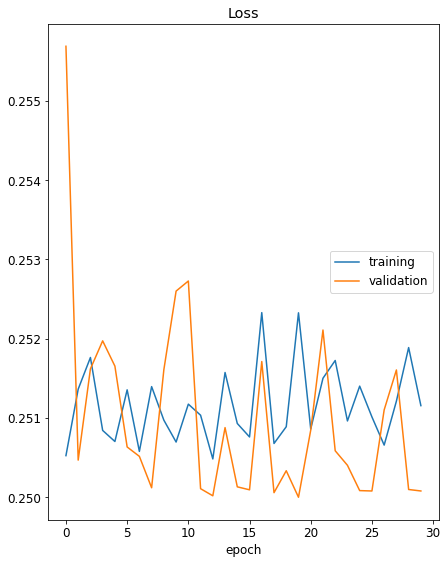

Loss
	training         	 (min:    0.250, max:    0.252, cur:    0.251)
	validation       	 (min:    0.250, max:    0.256, cur:    0.250)
Restoring model weights from the end of the best epoch: 20.
1283/1283 [==============================] - 4s 3ms/step - loss: 0.2512 - val_loss: 0.2501
Epoch 30: early stopping


In [ ]:
nn_file = my_path + 'nn1.h5'

history = train_model(model, nn_file, X_train, y_train, seed=5, 
                      max_epochs=200)

The validation loss stops to decrease too soon (only after 50 epochs). It may be due to the learning rate being too high (in the declaration of the function `make_sequential_model`, the default learning rate is 0.02). Let's try with a smaller one

In [ ]:
model = make_autoencoder(layer_sizes=first_architecture, learning_rate=0.001)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


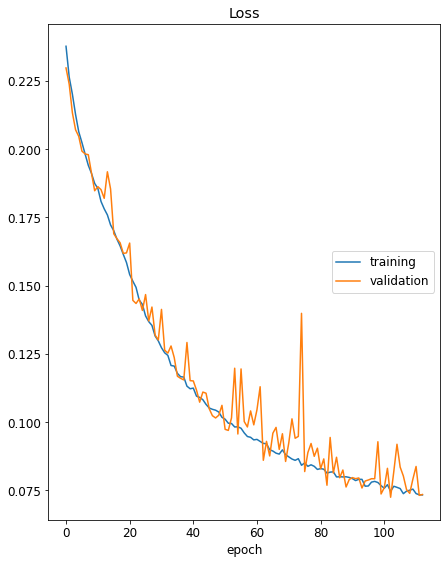

Loss
	training         	 (min:    0.073, max:    0.238, cur:    0.073)
	validation       	 (min:    0.072, max:    0.230, cur:    0.073)
Restoring model weights from the end of the best epoch: 103.
1283/1283 [==============================] - 4s 3ms/step - loss: 0.0733 - val_loss: 0.0735
Epoch 113: early stopping


In [ ]:
nn_file = my_path + 'nn1-lr_0.001.h5'
history = train_model(model, nn_file, X_train, y_train, seed=5, 
                      max_epochs=200)

We did not manage to remarkably decrease the loss. 

Let's anyways try to see if we can construct a decent anomaly detector.

# First Anomaly detector

## Model selection: selecting the threshold

The **anomaly score** of each sample is the reconstruction error.

In [ ]:
X_tr_reconstr = model.predict(X_train)
anomaly_scores = np.linalg.norm(X_tr_reconstr - X_train, axis=1)

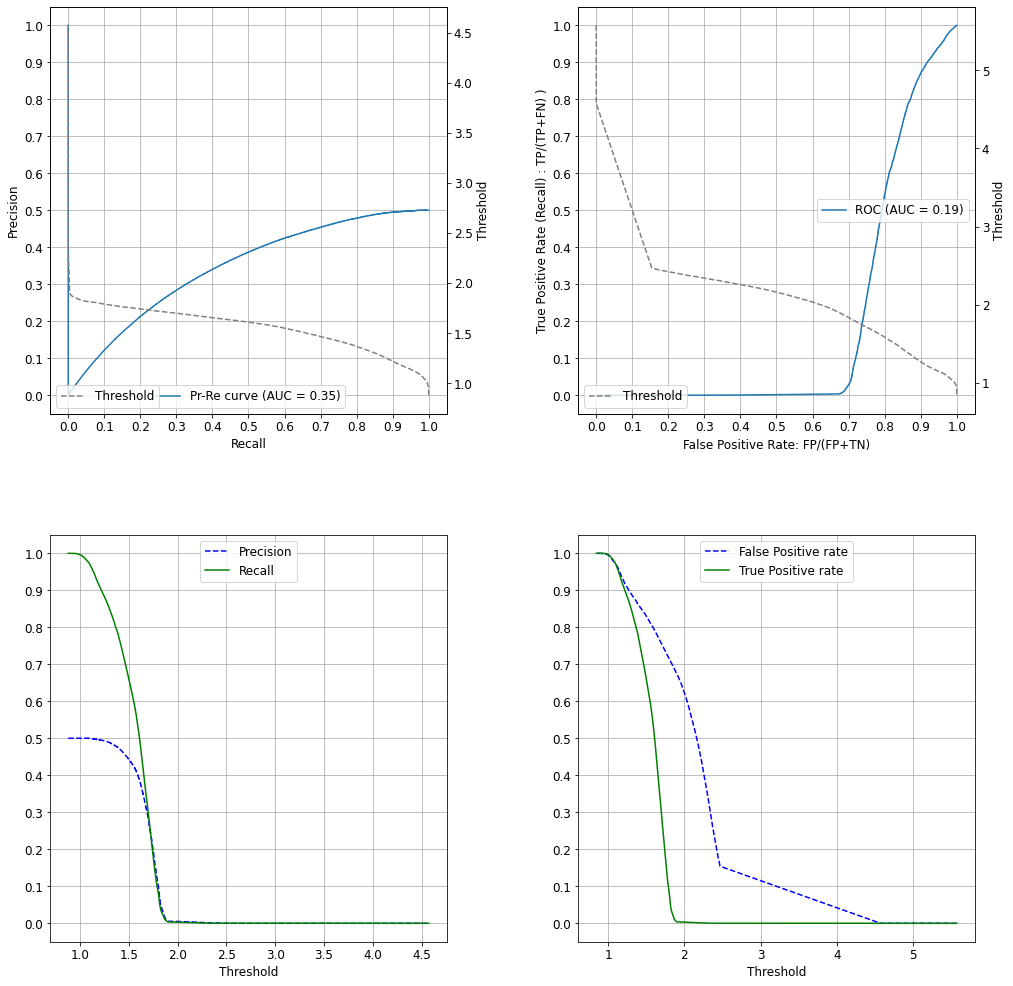

In [ ]:
evaluate_anomaly_detector(y_train, anomaly_scores)

Look at the ROC curve (top right figure). It is possible to have a True Positive Rate (Recall) >= 90%, while having a false positive rate <= 10%.
In other words, we can construct an anomaly detector able to find 90% of the anomalies with less than 10% of false alarms.

Looking at the grey curve on that plot, we see that such a configuration is for threshold of about 5. Let us search for a good value of threshold.

Precision= 0.43170953101361575
Recall= 0.5561705776876901
False Positive Rate =  0.7321275434630077
True Positive Rate =  0.5561705776876901


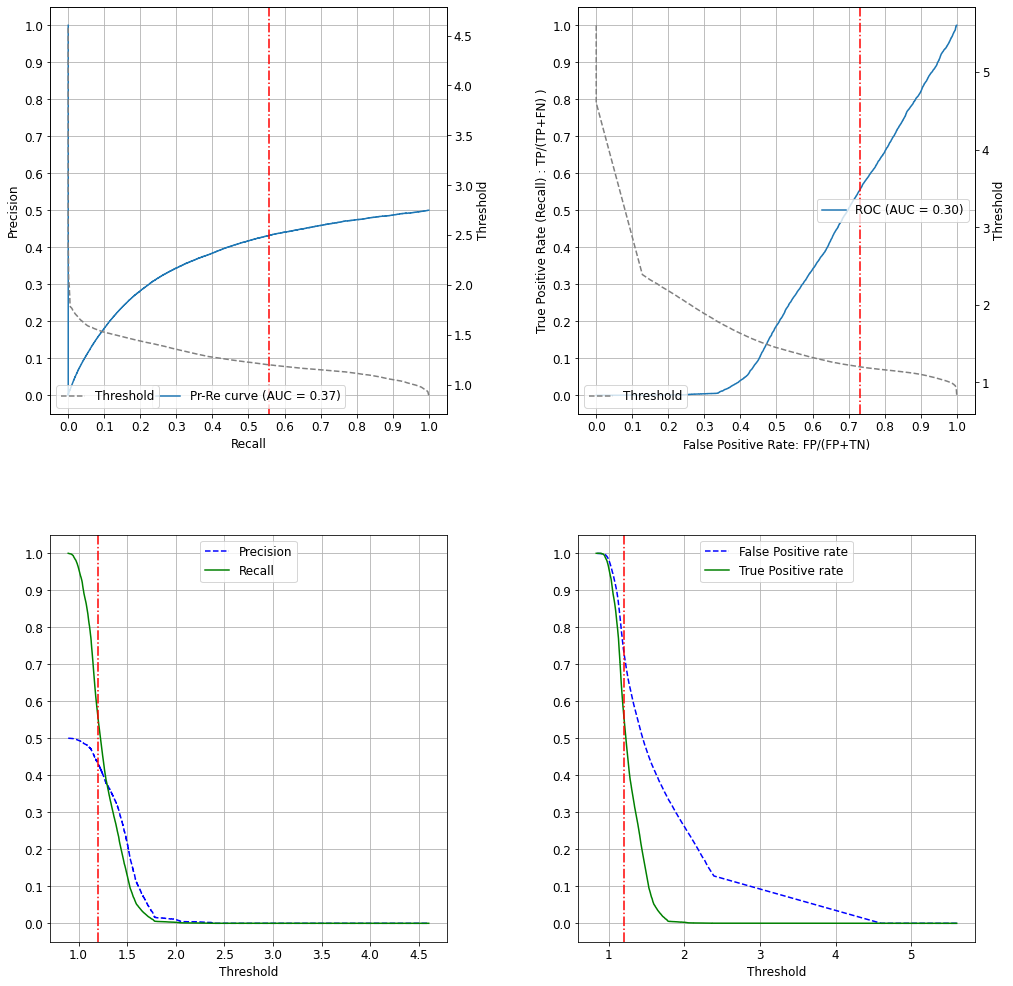

In [ ]:
threshold_selected = 1.2
evaluate_anomaly_detector(y_train, anomaly_scores, threshold_selected)

## Evaluate the model on the test set

In [ ]:
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
X_test_reconstr = model.predict(X_test_scaled)
anomaly_scores = np.linalg.norm(X_test_reconstr - X_test_scaled, axis=1)

y_pred = (anomaly_scores >= threshold_selected)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
fpr = false_positive_rate(y_test, y_pred)

print("Precision:", precision)
print("Recall: ", recall)
print("False Positive Rate:", fpr)


Precision: 0.008459844709699849
Recall:  1.0
False Positive Rate: 1.0


* Precision 1.3%: when the model says "anomaly!", it is right 1.3% of the time.
* Recall 89%: the model captures 89% of the anomalies
* False positive rate 11%: 11% of normal samples are erroneously classified as anomalies

Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


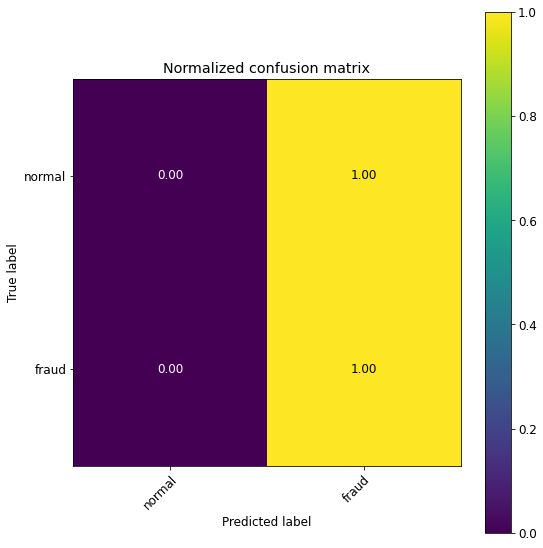

In [ ]:
class_names = np.array(["normal", "fraud"])
plot_conf_mat(y_test, y_pred, class_names)

The model is not bad, but we can further improve it.